In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install imghdr

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

In [4]:
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [7]:
gpus

[]

In [10]:
import cv2
import imghdr
from matplotlib import pyplot as plt


In [11]:
data_dir = 'data' 

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\1282554-kids.webp
Image not in ext list data\happy\Happy20People.jpg
Image not in ext list data\happy\how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
Image not in ext list data\sad\CC_HE_1221887081_SituationalDepression.jpg
Image not in ext list data\sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data\sad\Sad-People.jpg.webp


In [14]:
import numpy as np

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 352 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

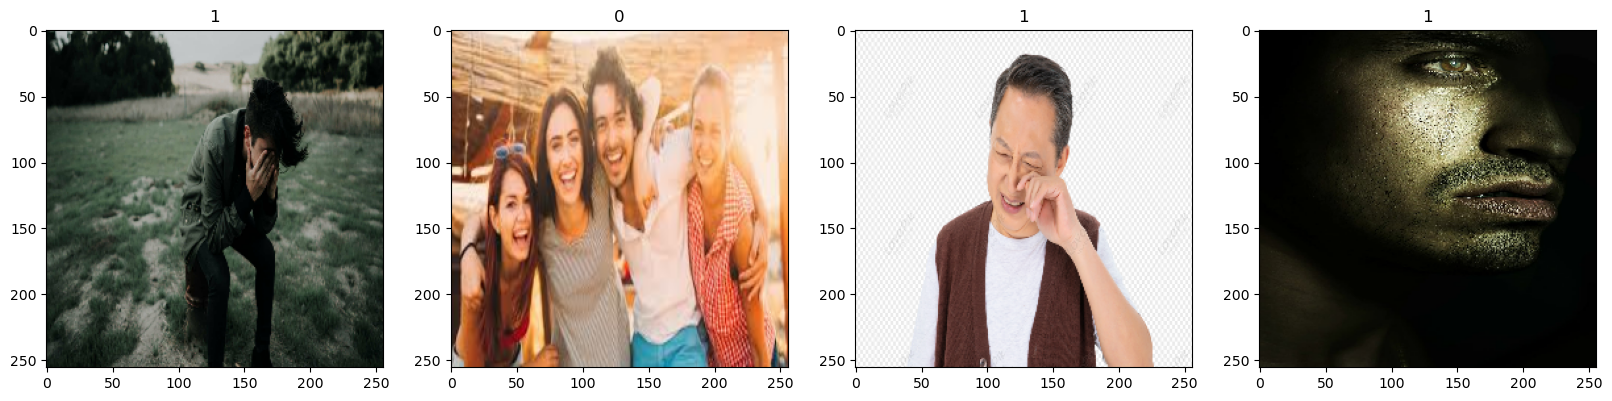

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
len(data)

11

In [25]:
int(len(data)*.1)

1

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)

In [28]:
train_size + val_size + test_size

11

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 8s 819ms/step - loss: 0.5976 - accuracy: 0.6830 - val_loss: 0.7879 - val_accuracy: 0.6875
Epoch 2/20
7/7 [==============================] - 4s 503ms/step - loss: 0.5321 - accuracy: 0.7054 - val_loss: 0.5046 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 4s 487ms/step - loss: 0.5264 - accuracy: 0.7366 - val_loss: 0.4302 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 4s 514ms/step - loss: 0.4751 - accuracy: 0.8080 - val_loss: 0.4567 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 4s 500ms/step - loss: 0.3853 - accuracy: 0.8259 - val_loss: 0.3047 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 4s 484ms/step - loss: 0.4084 - accuracy: 0.8170 - val_loss: 0.3387 - val_accuracy: 0.9167
Epoch 7/20
7/7 [==============================] - 4s 500ms/step - loss: 0.3620 - accuracy: 0.8839 - val_loss: 0.3356 - val_accuracy: 0.8542
Epoch 8/20
7/7 [==

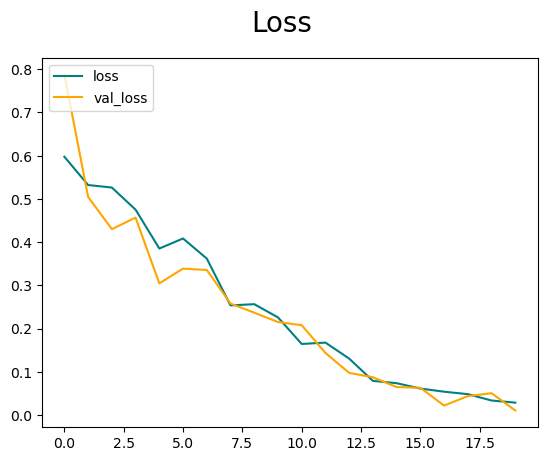

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

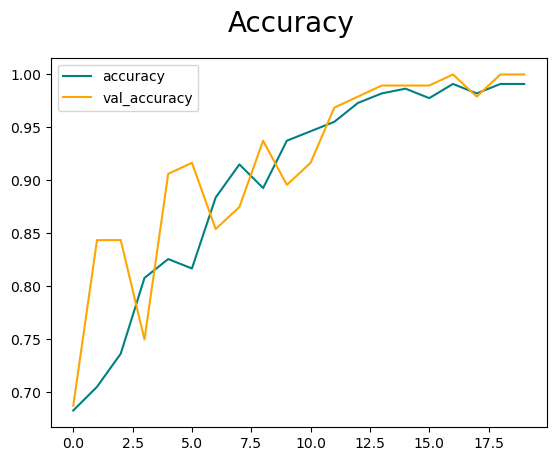

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 187ms/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [45]:

import cv2

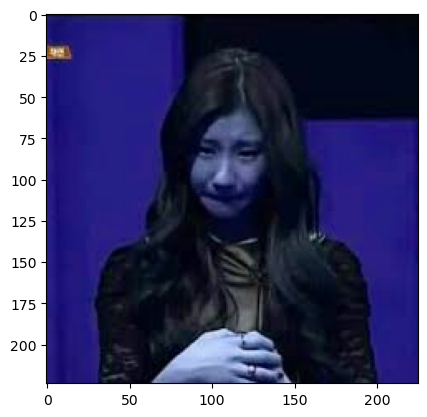

In [76]:
img = cv2.imread('crybaby.jpg')
plt.imshow(img)
plt.show()

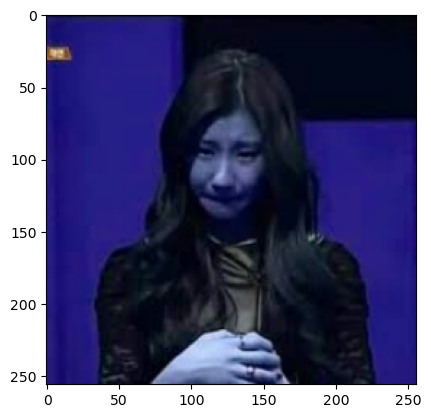

In [77]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [81]:
yhat

array([[0.9964839]], dtype=float32)

In [82]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [72]:
from tensorflow.keras.models import load_model

In [73]:
model.save(os.path.join('models','imageclassifier.h5'))

In [78]:
new_model = load_model('imageclassifier.h5')

In [79]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 100ms/step


array([[0.9964839]], dtype=float32)